In [1]:
from imapclient import IMAPClient
import getpass

In [2]:
host = "imap.mailbox.org"

In [3]:
user = "hallo@pbrinkmeier.de"
pw = getpass.getpass()
server = IMAPClient(host)
server.login(user, pw)

 ········


b'[CAPABILITY IMAP4rev1 SASL-IR LOGIN-REFERRALS ID ENABLE IDLE SORT SORT=DISPLAY THREAD=REFERENCES THREAD=REFS THREAD=ORDEREDSUBJECT MULTIAPPEND URL-PARTIAL CATENATE UNSELECT CHILDREN NAMESPACE UIDPLUS LIST-EXTENDED I18NLEVEL=1 CONDSTORE QRESYNC ESEARCH ESORT SEARCHRES WITHIN CONTEXT=SEARCH LIST-STATUS BINARY MOVE SNIPPET=FUZZY PREVIEW=FUZZY PREVIEW STATUS=SIZE SAVEDATE SEARCH=X-MIMEPART XDOVECOT ACL UIDPLUS LITERAL+ NOTIFY SPECIAL-USE FILTER=SIEVE COMPRESS=DEFLATE XAPPLEPUSHSERVICE QUOTA ACL RIGHTS=texk] Logged in'

In [4]:
# [name for (meta, parent, name) in server.list_folders()]

In [5]:
select_info = server.select_folder('INBOX/Uni/Fachschaft')

In [6]:
message_ids = server.search()
messages = list(data for id, data in server.fetch(message_ids, ['ENVELOPE']).items())

In [7]:
len(messages)

7927

In [8]:
# messages[0]

In [9]:
tos = [list(message[b'ENVELOPE'].to) for message in messages if message[b'ENVELOPE'].to]
len(tos)

7833

In [10]:
flat_tos = [f"{to.mailbox.decode('utf-8')}@{to.host.decode('utf-8')}" for tos_ in tos for to in tos_ if to.mailbox and to.host]
len(flat_tos)

11457

In [11]:
from collections import Counter

In [12]:
tos_count = list(Counter(flat_tos).items())
tos_count.sort(key=lambda x: -x[1])

for to, count in tos_count[:20]:
    # print(f"{count:4} {to}")
    pass

In [13]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [10, 5]
matplotlib.rcParams['figure.dpi'] = 600

In [14]:
date_fmt = "%Y-%m-%d"

dates = [message[b'ENVELOPE'].date for message in messages]
dates_data = list(Counter(date.strftime(date_fmt) for date in dates).items())
# Counter(date.strftime(date_fmt) for date in dates).most_common()[:10]

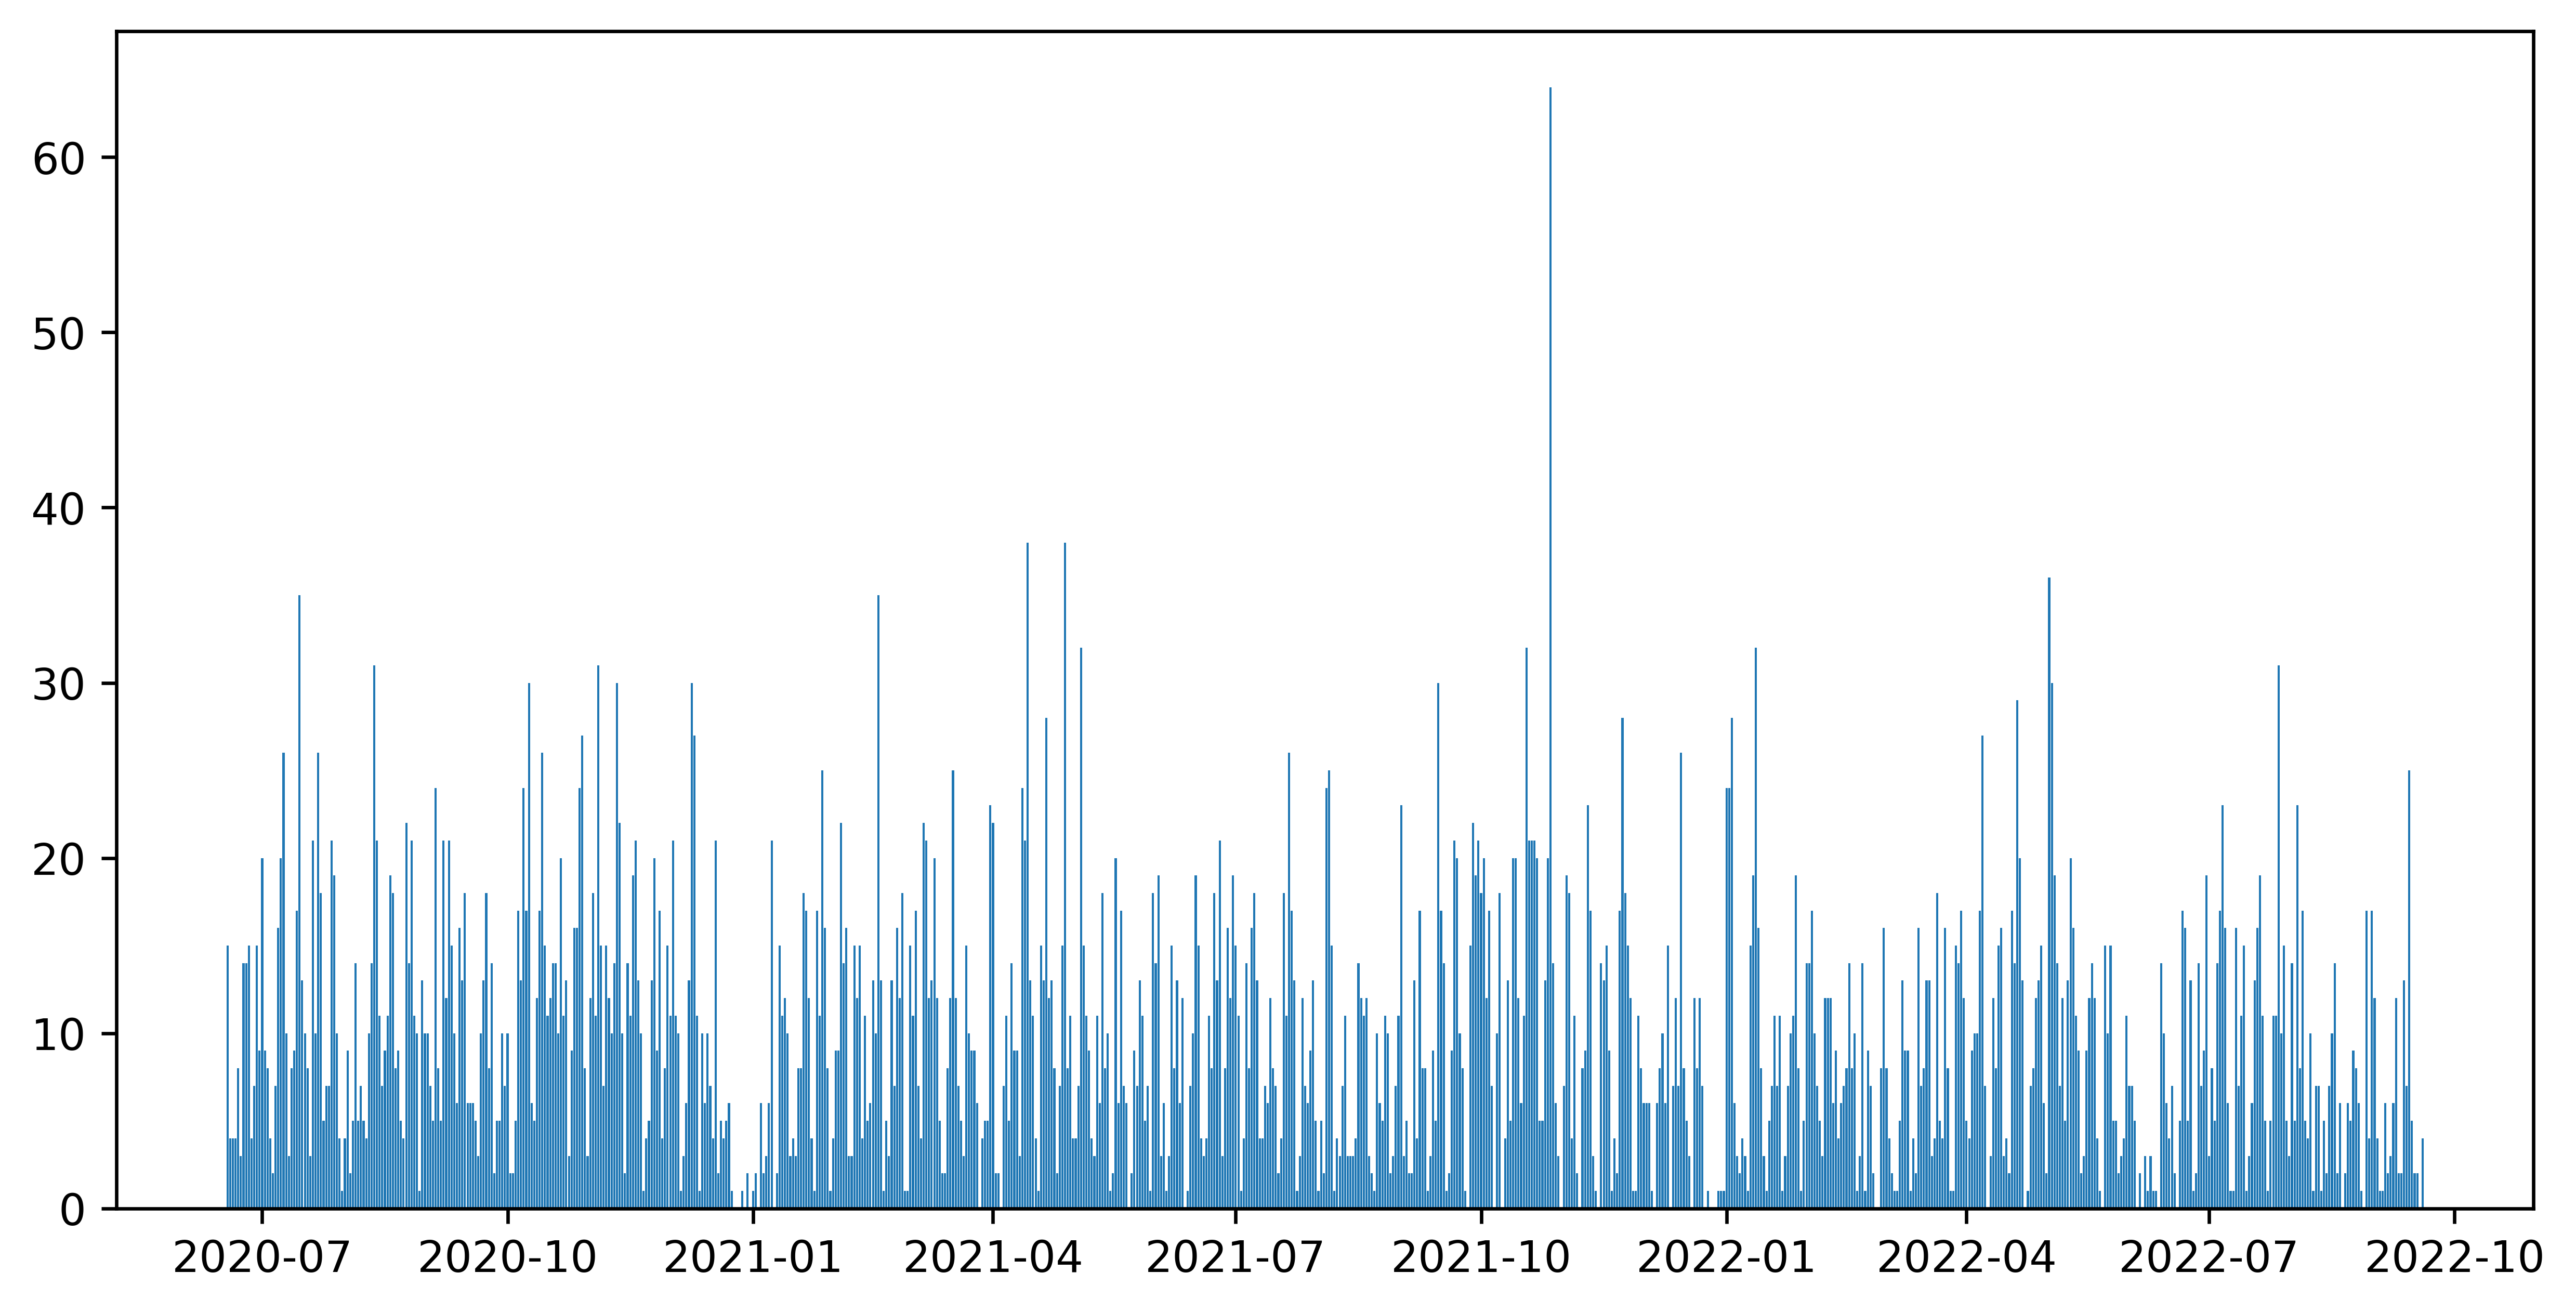

In [15]:
from datetime import datetime

plt.bar([datetime.strptime(date, date_fmt) for date, count in dates_data], [count for date, count in dates_data])
plt.show()